## CNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import mean_squared_error, r2_score


from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [3]:
hdb_model_data = pd.read_csv("hdb_model_data.csv")
hdb_model_data.head()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
0,0.0625,0.114583,0.0,0.0,0.229833,0.242702,0.377101,1.0,0.113027
1,0.3750,0.098958,0.0,0.0,0.888889,0.181339,0.376605,1.0,0.339299
2,0.0000,0.114583,0.0,0.0,0.243531,0.153615,0.373691,1.0,0.077851
3,0.0625,0.114583,0.0,0.0,0.223744,0.212727,0.381423,1.0,0.128102
4,0.1250,0.088542,0.0,0.0,0.292237,0.247779,0.408523,1.0,0.084059


In [4]:
X = hdb_model_data.iloc[:,0:8]
y= hdb_model_data.iloc[:,-1]  


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
#Step 1: we the dataset into a image
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [7]:
#Step 2: we reshape the data

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 

In [8]:
#Step 3: normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

In [26]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1614 - accuracy: 0.9538 - val_loss: 0.0587 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0555 - accuracy: 0.9833 - val_loss: 0.0479 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0464 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0449 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0528 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0.0456 - val_accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0499 -

In [32]:
#evaluting the model
result = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0652 - accuracy: 0.9839


In [40]:
r=model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [45]:
# mse = mean_squared_error(y_test,r)
# print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_test, r).round(2))
# print("Mean Squared Error(R2): "+ str(mse))

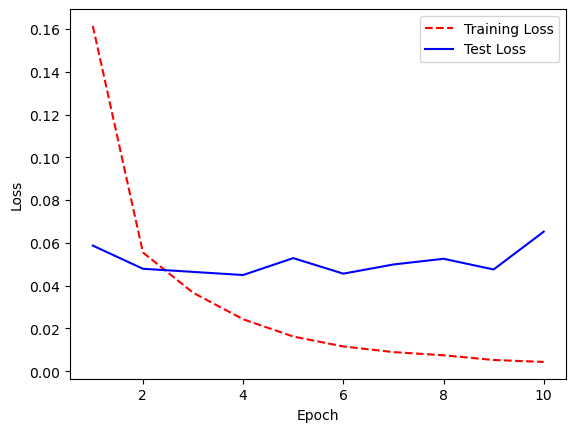

In [29]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

313/313 - 1s - loss: 0.0652 - accuracy: 0.9839 - 1s/epoch - 4ms/step


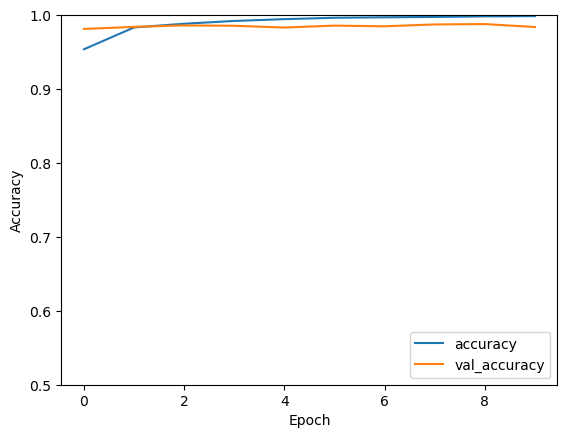

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [36]:
print(model.metrics_names)
print(result)

['loss', 'accuracy']
[0.06521245092153549, 0.9839000105857849]
